In [2]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df_DA_USA=df[(df['job_country']=='United States') & (df['job_title']=='Data Analyst')].copy()

In [4]:
df_DA_USA=df_DA_USA.dropna(subset=['salary_year_avg'])
df_DA_USA['salary_year_avg'].head()

1681    111175.0
3237    120000.0
3807    117500.0
5182     85000.0
5839     67500.0
Name: salary_year_avg, dtype: float64

<Axes: >

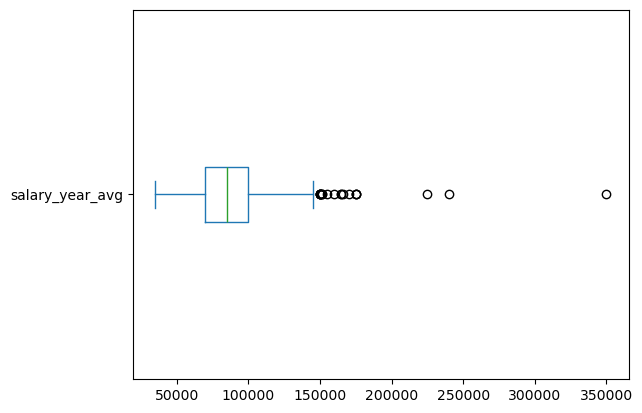

In [5]:
df_DA_USA['salary_year_avg'].plot(kind='box',vert=False)

In [6]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
df_jobs_USA=df[(df['job_country']=='United States') & (df['job_title'].isin(job_titles))].copy()


In [7]:
df_jobs_USA=df_jobs_USA.dropna(subset=['salary_year_avg'])
df_jobs_USA['salary_year_avg'].head()

116     114000.0
307     185000.0
388      89000.0
1106    137500.0
1164    190000.0
Name: salary_year_avg, dtype: float64

In [8]:
df_jobs_USA.value_counts('job_title')

job_title
Data Scientist    1218
Data Analyst      1118
Data Engineer      886
Name: count, dtype: int64

In [9]:
job_list=[df_jobs_USA[df_jobs_USA['job_title_short']==job]['salary_year_avg']for job in job_titles]

/var/folders/jg/9_yq4crd40bc84tn82nc31nm0000gn/T/ipykernel_28751/3834248865.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,vert=False,labels=job_titles)


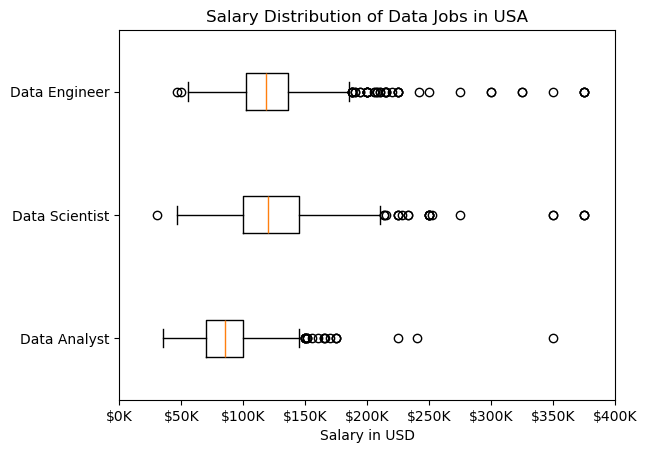

In [10]:
plt.boxplot(job_list,vert=False,labels=job_titles)
plt.xlabel('Salary in USD')
plt.title('Salary Distribution of Data Jobs in USA')
plt.xlim(0,400000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [13]:
import seaborn as sns

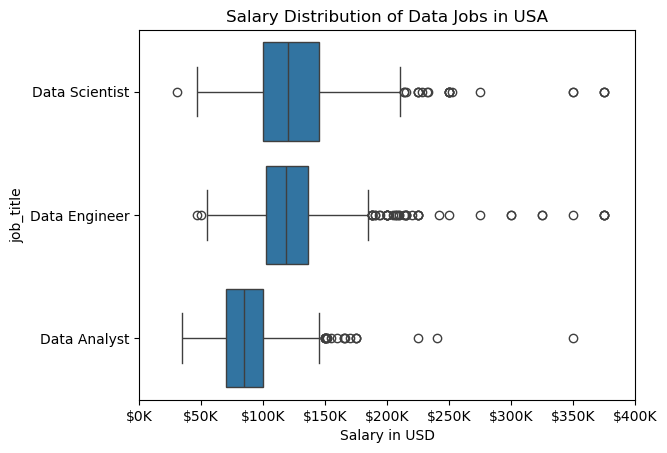

In [14]:
sns.boxplot(data=df_jobs_USA,x='salary_year_avg',y='job_title')
plt.xlabel('Salary in USD')
plt.title('Salary Distribution of Data Jobs in USA')
plt.xlim(0,400000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa